# <center> Fall 2021 CS559: Homework #1 </center>

### <center> Due: **9/23/2021 Thursday 11:59 PM** </center>



- Before you start, rename the file as *LastNameFirstName*_F21_CS559_HW1 (e.g., JangInsuk_F21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [20 pts]
This problem task to implement functions of matrix operations - multiplication and tranpose. Please do not use numpy matrix packages in implementations.  

1-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

In [3]:
import numpy as np 

In [28]:
### Code Starts Here
def mat_product(A,B):
    rA = len(A)
    cA = len(A[0])
    rB = len(B)
    cB = len(B[0])

    C = [[0 for x in range(cB)] for y in range(rA)]

    if (cA != rB):
        print('Matrix multiplication Error : Invaid Dimensions')
        return None
    else:
        for i in range(rA):
            for j in range(cB):
                Bcol = getColumnAsList(B,j)
                product = [A[i][k]*Bcol[k] for k in range(len(Bcol))]
                C[i][j] = sum(product)
    return C  

def getColumnAsList(X, col):
    colList = []
    for i in range(len(X)):
        colList.append(X[i][col])
    return colList

1-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [2 pts]

In [32]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(11,size=(3,3))
Y=np.random.randint(11,size=(3,3))
print(X)
print(Y)
print(mat_product(X,Y))

[[6 1 2]
 [3 3 0]
 [6 1 4]]
[[ 5  9  2]
 [ 6 10  0]
 [ 5  8  2]]
[[46, 80, 16], [33, 57, 6], [56, 96, 20]]


1-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [10 pts]


In [33]:
### Code Starts Here
def mat_transpose(X):
    r = len(X)
    c = len(X[0])
    X_T = []
    for j in range(c):
        row = []
        for i in range(r):
           row.append(X[i][j])
        X_T.append(row)
        
    return X_T

In [34]:
Z=mat_product(mat_transpose(X),Y)
print(Z)

[[78, 132, 24], [28, 47, 4], [30, 50, 12]]


In [35]:
### Code np.matmul() starts here
Z=np.matmul(X.transpose(),Y)
print(Z)

[[ 78 132  24]
 [ 28  47   4]
 [ 30  50  12]]


### Problem 2 [20 pts]
2-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". 
   

In [4]:
### Code Starts Here
import pandas as pd
from tqdm import trange
def coin_prob(pi,n,k):
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    #To find-> P(k_H) for n coins tossed N times with p(H)=pi per coin toss.
    #Map results for each trial to ProbTable
    Ls = []
    heads=[]
    for N in trange(50, 10000 + 1, 50):
        Ls.append([])
        Ls[-1].append(N)
        success = 0
        for t in range(N):
            if(k==np.random.binomial(n, pi)):
                success += 1
        Ls[-1].append(success/N)
    ProbTable=pd.DataFrame(Ls, columns = list('ts'))
    return(ProbTable)

2-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [5 pts]

In [5]:
one_coins=coin_prob(pi=0.5,n=1,k=1)

100%|██████████| 200/200 [00:01<00:00, 162.85it/s]


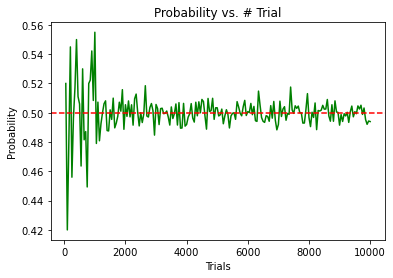

In [6]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coins.t, one_coins.s, 'g-')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.title('Probability vs. # Trial')
plt.show()

2-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [5 pts]

In [7]:
### Code starts here
k = 1
n = 3
pi = 0.5

P1head = n / (2**n)

print("Probability of 1 head if 3 coins are tossed =", P1head)

Probability of 1 head if 3 coins are tossed = 0.375


2-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [8]:
three_coins=coin_prob(pi=0.5,n=3,k=1)

100%|██████████| 200/200 [00:01<00:00, 167.00it/s]


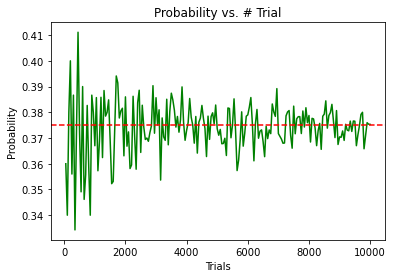

In [9]:
"""Plot shows here"""
plt.plot(three_coins.t, three_coins.s, 'g-')
plt.axhline(y=0.375, color='r', linestyle='--')
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.title('Probability vs. # Trial')
plt.show()

### Problem 3 [20 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [29]:
import pandas as pd
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')

3-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [30]:
### Code Starts Here
Country_GDP=pd.merge(Country, gdp, on="CountryCode",how = "left")
#the IDs that dont match will have NaN value for Rank, CountryName and GDP as it is merged left,we can find null values for Country name as it is a unique, non-nullable column
#Code to find count of matching IDs
NoMatch = Country_GDP['CountryName'].isna().sum()
Matchcount = len(Country_GDP) - NoMatch

In [31]:
### Print the number of IDs
print(Matchcount)

189


3-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

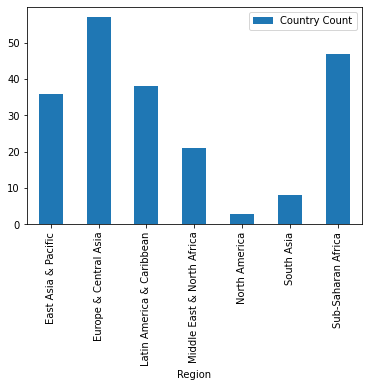

In [42]:
### Code Starts Here
import matplotlib.pyplot as plt
barP = Country_GDP.groupby('Region')['Region'].count().reset_index(name='Country Count')
barP.plot(x = "Region", y = "Country Count", kind = "bar")
plt.show()
###Europe and Central Asia have the largest number of Countries

3-c: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

In [ ]:
### Code Starts Here
from scipy.stats import ks_2samp
flag = True
dt = []
for i in trange(len(num_country_by_region)):
    a = Country_GDP[Country_GDP['Region'] == num_country_by_region.index[i]]['GDP']
    for j in range(len(num_country_by_region)):
        b = Country_GDP[Country_GDP['Region'] == num_country_by_region.index[j]]['GDP']
        for l in dt:
            if num_country_by_region.index[i] in l and num_country_by_region.index[j] in l:
                flag = False
        if flag:
            dt.append([])
            dt[-1].append(num_country_by_region.index[i])
            dt[-1].append(num_country_by_region.index[j])
            b = ks_2samp(a,b)
            dt[-1].append(round(b.statistic,4))
            dt[-1].append(round(b.pvalue,4))
        flag = True

dt.pop(0)
cols = ['Region A', 'Region B', 'KS_statistic', 'KS_ pvalue']

f, a = plt.subplots(figsize=(15,6))
f.patch.set_visible(False)
a.axis('off')
df = pd.DataFrame(dt, columns=cols)
a.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.show()

3-d: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [ ]:
### Code Starts Here

Country_GDP=pd.merge(Country,gdp,on='CountryCode')
c = Country_GDP
c['GDP'] = c.GDP.str.replace(',', '').astype(float)
c.groupby(['Income Group'])['GDP'].agg(mean_gdp='mean',std_gdp='std')

### Problem 4 - Clustering Using KMeans [20 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW1_Q1_0.csv` containing coordinates of x and y. 

4-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [16]:
import pandas as pd

In [39]:
### Code starts here
kdata = pd.read_csv('HW1_Q1_0.csv', header= None)
kdata.columns = ['X', 'Y']

4-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

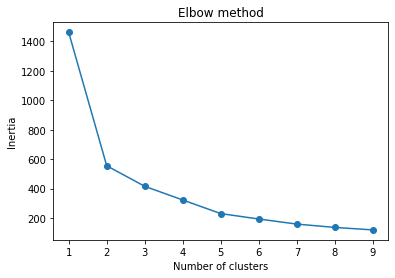

,Inertia
n = 1,1462.008530
n = 2,555.425223
n = 3,415.835838
n = 4,322.871381
n = 5,230.500209
n = 6,193.824281
n = 7,159.306195
n = 8,136.733156
n = 9,119.859829


In [96]:
### Code starts here
plot_inertia(kmeans,kdata,range(1,10))
#K value of 5 seems appropriate as rate of change of inertia is relatively small after 5

4-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

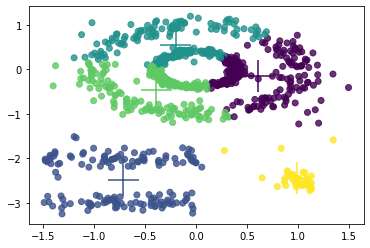

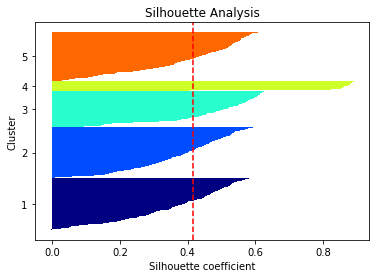

In [97]:
### Code starts here
import matplotlib.pyplot as plt
kmeans.set_params(n_clusters=5)
kmeans.fit(kdata)
plt.scatter(kdata['X'],kdata['Y'],c=kmeans.labels_,alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="+",s=1000,c=[0,1,2,3,4])
plt.show()

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

def plot_silhouette(km, x):
    y_km = kmeans.fit_predict(x)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster c, and sort them
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()

        size_cluster_c = len(c_silhouette_vals)
        y_ax_upper += size_cluster_c
        color = cm.jet(i*1.0/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, color=color)

        # Compute the new y_ax_lower for next plot
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += size_cluster_c

    # The vertical line for average silhouette score of all the values
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')

    plt.yticks(yticks, cluster_labels + 1)
    plt.title('Silhouette Analysis')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()
    
plot_silhouette(kmeans, kdata)

#predetermined k value seems appropriate as silhouette coefficient seems big enough

### Problem 5 - Principal Component Analysis [20 pts]


In [98]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

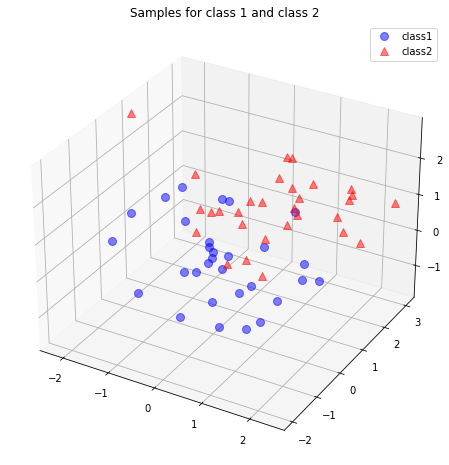

In [99]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()